# Bitcoin wrangling 2 -> Technical indicators

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import talib
import seaborn as sns

## Load data

In [2]:
df = pd.read_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/data/Bitcoin_data_2024.csv",
                 index_col=0,
                 parse_dates=True)

In [3]:
# Ensure plot qualities 
plt.rcParams['figure.figsize'] = (12,6)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300  # Adjust DPI for high-resolution figures

## Create new features 

In [4]:
# Compute log returns
df['Returns%'] = np.log(df['Close'] / df['Close'].shift(1))*100

In [ ]:
# Simple moving average (SMA)
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)

In [ ]:
# Standard deviation (rolling volatility)
df['Volatility_20'] = talib.STDDEV(df['Close'], timeperiod=20, nbdev=1)

In [ ]:
# Momentum indicators

# Relative strength index (RSI)
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

# Moving average convergence divergence (MACD)
_, _, df['MACD_Hist'] = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Rate of change (ROC)
df['ROC'] = talib.ROC(df['Close'], timeperiod=10)

# Commodity channel index (CCI)
df['CCI'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)

# Williams %R
df['WilliamsR'] = talib.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)

In [ ]:
# Trend indicator
# ADX (average directional index)
df['ADX'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)

In [9]:
df

,Open,High,Low,Close,VolumeBTC,VolumeUSD,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,ROC,CCI,WilliamsR,ADX
date,,,,,,,,,,,,,,,
2024-01-01 00:00:00,42258.0,42268.0,42257,42268,1.049735,44370.180382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:01:00,42268.0,42283.0,42268,42283,2.291939,96910.057583,0.035482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:02:00,42288.0,42298.0,42288,42298,1.569998,66407.775404,0.035469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:03:00,42297.0,42353.0,42297,42353,4.883858,206846.034909,0.129945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-01 00:04:00,42359.0,42375.0,42359,42375,5.742427,243335.353448,0.051931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 23:55:00,93476.0,93476.0,93471,93471,0.179799,16805.981112,-0.023534,93353.00,82.097503,61.853949,24.510813,0.166102,80.515852,-10.045662,23.141107
2024-12-31 23:56:00,93469.0,93469.0,93469,93469,0.021400,2000.236600,-0.002140,93362.30,84.150520,61.432197,21.537986,0.156446,66.290491,-12.565445,22.308489
2024-12-31 23:57:00,93462.0,93462.0,93413,93427,0.034750,3246.554616,-0.044945,93368.75,83.918338,53.224757,15.865447,0.115732,29.607917,-35.869565,21.254018


In [10]:
df.isna().sum()

Open              0
High              0
Low               0
Close             0
VolumeBTC         0
VolumeUSD         0
Returns%          1
SMA_20           19
Volatility_20    19
RSI              14
MACD_Hist        33
ROC              10
CCI              13
WilliamsR        13
ADX              27
dtype: int64

In [11]:
# Drop NaN values 
df.dropna(inplace=True)

In [12]:
df.isna().sum()

Open             0
High             0
Low              0
Close            0
VolumeBTC        0
VolumeUSD        0
Returns%         0
SMA_20           0
Volatility_20    0
RSI              0
MACD_Hist        0
ROC              0
CCI              0
WilliamsR        0
ADX              0
dtype: int64

In [13]:
df.head()

,Open,High,Low,Close,VolumeBTC,VolumeUSD,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,ROC,CCI,WilliamsR,ADX
date,,,,,,,,,,,,,,,
2024-01-01 00:33:00,42367.0,42373.0,42365,42371,0.016585,702.728120,-0.028317,42445.10,40.591748,43.950871,-22.142249,-0.221359,-128.462149,-94.594595,47.478318
2024-01-01 00:34:00,42357.0,42357.0,42351,42351,0.019690,833.891190,-0.047213,42439.60,45.249751,39.611671,-21.969636,-0.284894,-132.476899,-100.000000,44.942988
2024-01-01 00:35:00,42359.0,42359.0,42351,42359,0.031363,1328.501505,0.018888,42433.20,47.106900,42.075166,-20.371629,-0.275450,-107.157984,-93.600000,42.503637
2024-01-01 00:36:00,42368.0,42377.0,42356,42377,0.034081,1444.249689,0.042485,42425.65,43.250751,47.285831,-17.279376,-0.183724,-72.268194,-79.200000,39.498642
2024-01-01 00:37:00,42395.0,42411.0,42392,42403,0.005832,247.290480,0.061335,42421.20,40.698403,53.756702,-12.862734,-0.077764,-8.262512,-58.400000,37.792666


## Feature Selection

In [14]:
# # Drop the 'Open', 'High', 'Low', 'Close', 'VolumeUSD' columns
# df = df.drop(columns = ['Open', 'High', 'Low', 'Close', 'VolumeUSD'])

# Drop the 'VolumeUSD' columns
df = df.drop(columns = ['VolumeUSD'])

In [15]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Returns%', 'SMA_20',
       'Volatility_20', 'RSI', 'MACD_Hist', 'ROC', 'CCI', 'WilliamsR', 'ADX'],
      dtype='object')

In [16]:
# df.corr()

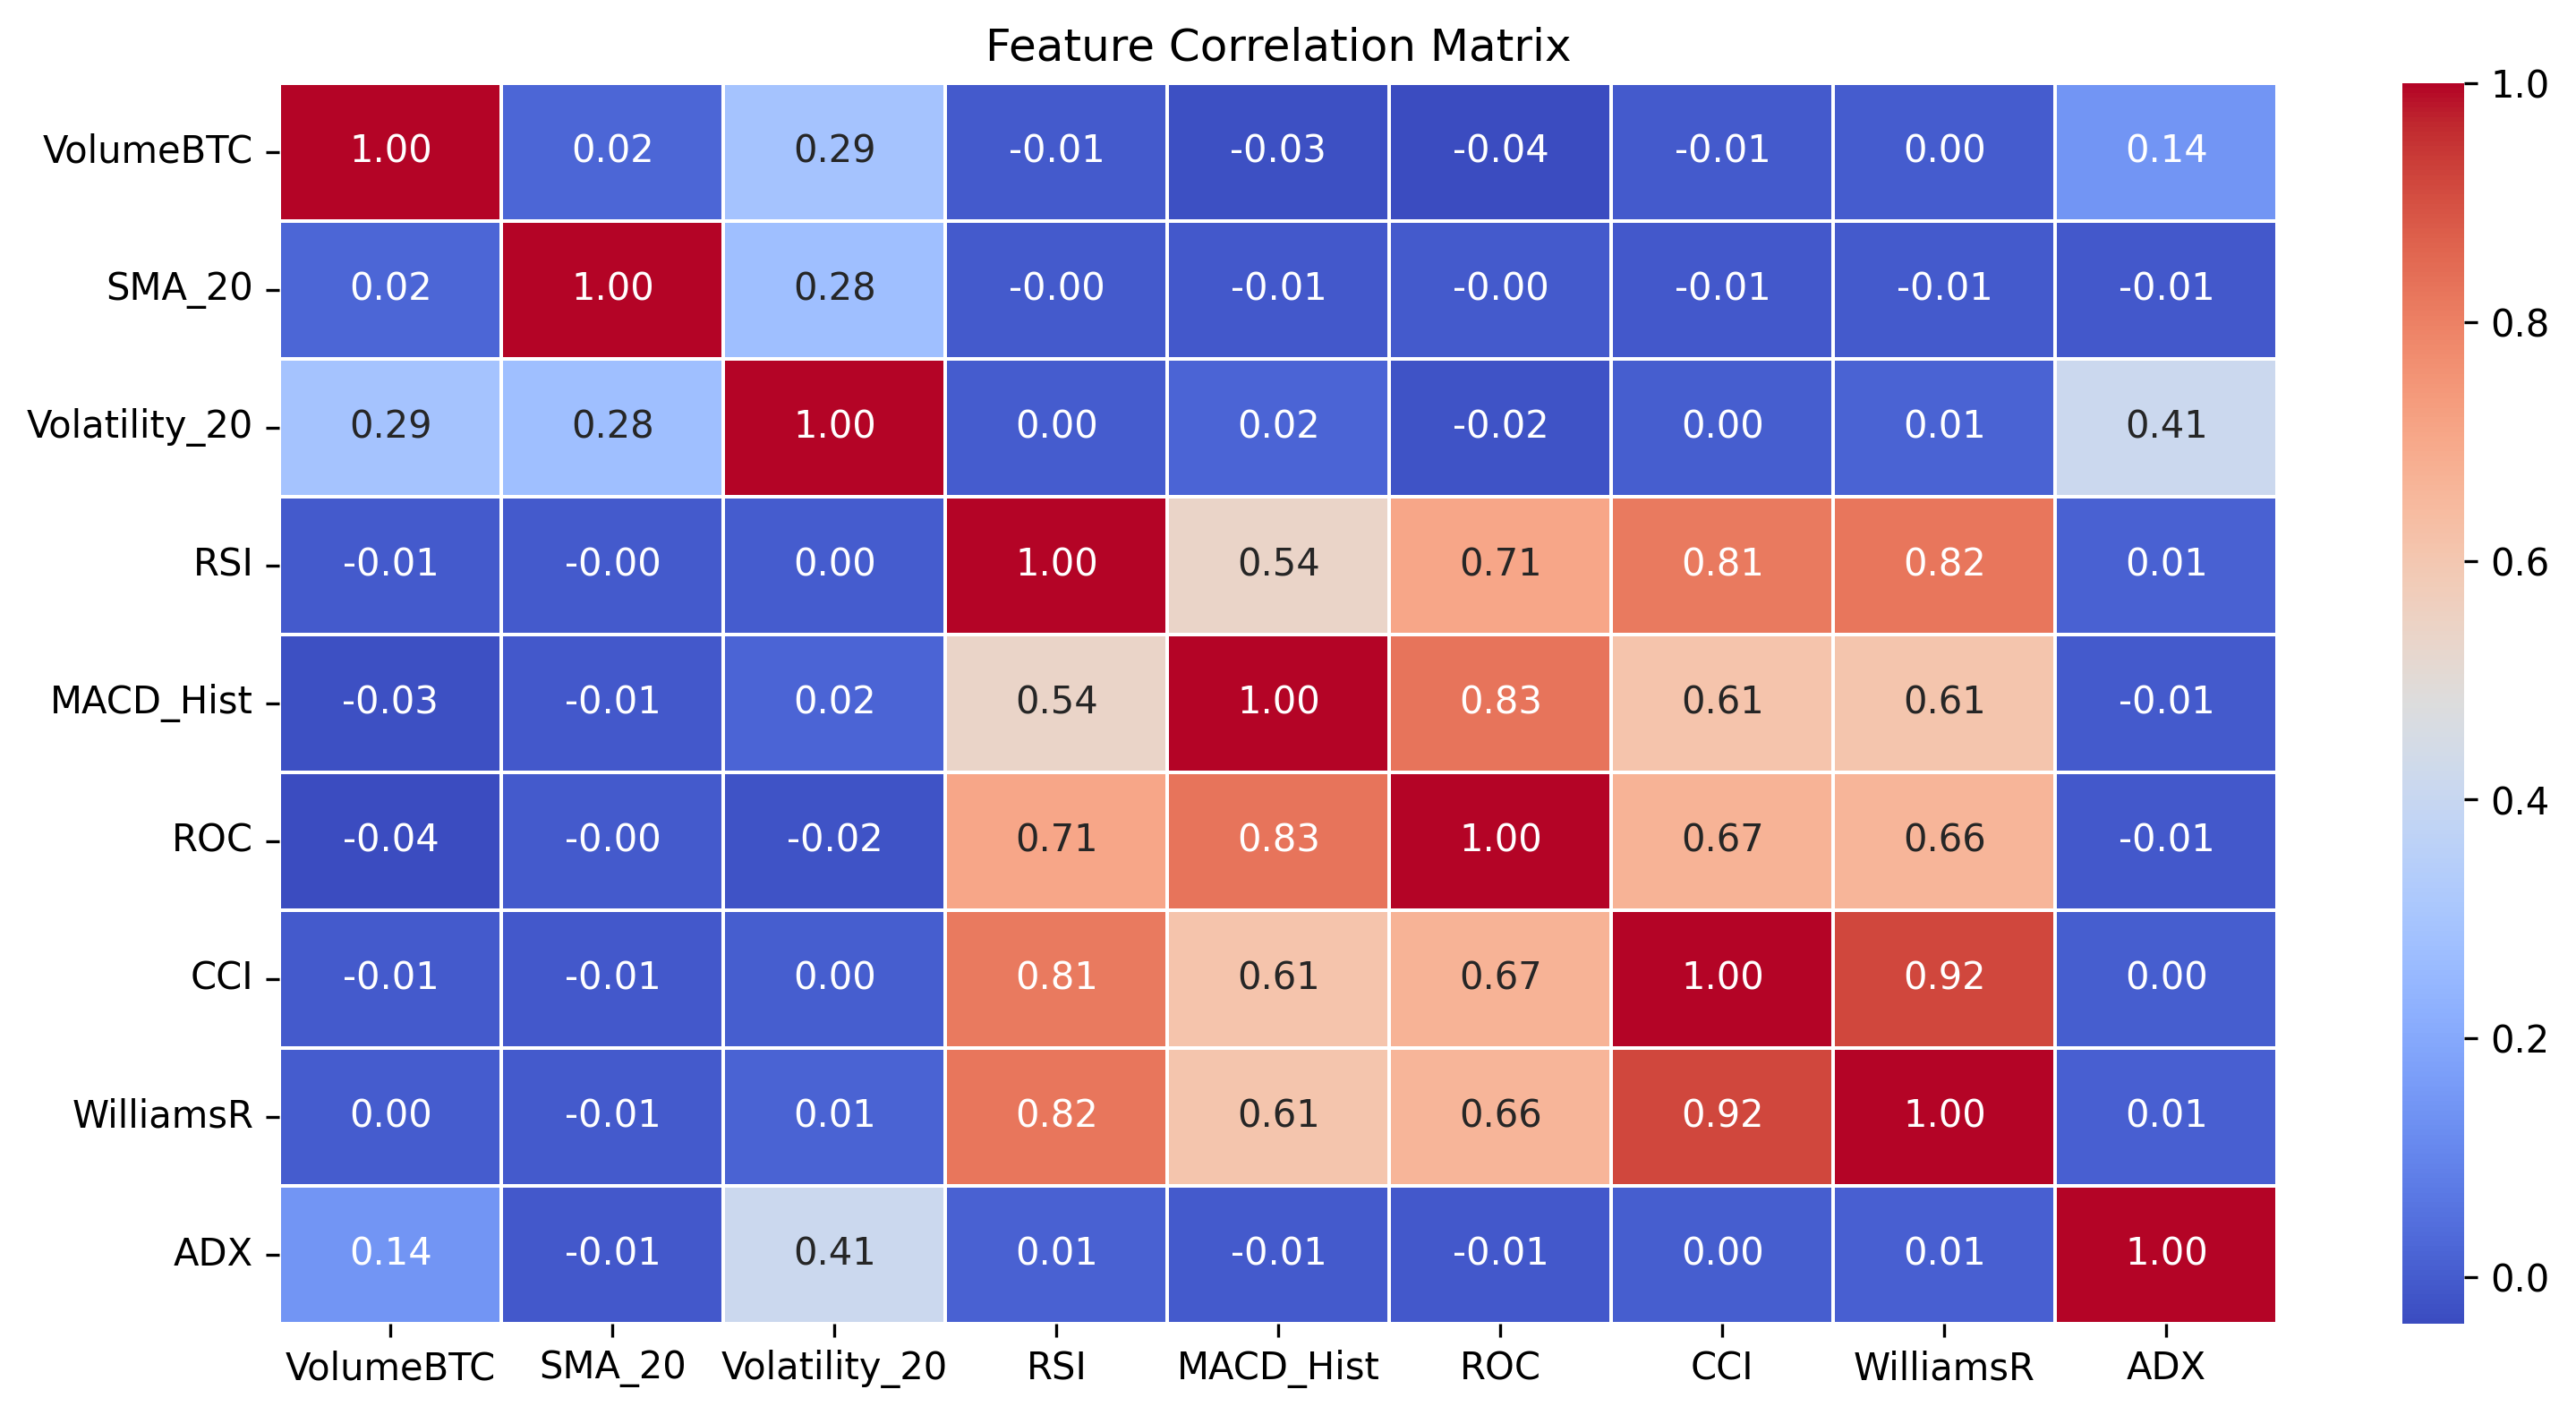

In [17]:
# Compute correlation matrix (excluding the 'Returns%' column)
corr_matrix = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Returns%']).corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
df.describe()

,Open,High,Low,Close,VolumeBTC,Returns%,SMA_20,Volatility_20,RSI,MACD_Hist,ROC,CCI,WilliamsR,ADX
count,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000,509331.000000
mean,65866.069673,65885.117781,65847.013551,65866.261345,1.536978,0.000155,65865.310337,67.689795,50.328159,-0.000172,0.001824,0.844191,-48.992866,23.685383
std,14578.233579,14582.035337,14574.079190,14577.981596,5.084706,0.075611,14577.563054,60.857080,11.865934,16.795689,0.233830,108.515306,33.930424,9.657768
min,38515.000000,38525.000000,38505.000000,38508.000000,0.000000,-3.612019,38611.950000,0.000000,0.013257,-478.617386,-5.781413,-466.666667,-100.000000,5.253474
25%,59059.000000,59078.000000,59041.000000,59061.000000,0.029598,-0.029788,59064.050000,31.105365,42.169122,-7.044330,-0.098554,-85.602857,-80.412371,16.592119
50%,64208.000000,64225.000000,64192.000000,64209.000000,0.208041,0.000000,64207.650000,50.431042,50.286135,-0.082622,0.001427,1.876553,-48.484848,21.596721
75%,68984.500000,69000.000000,68967.000000,68985.000000,0.881507,0.030188,68989.300000,82.870373,58.456689,6.906381,0.103377,87.617539,-17.142857,28.676055
max,108293.000000,108364.000000,108204.000000,108276.000000,339.941471,2.622989,108021.050000,1655.708909,98.446574,216.999181,4.400336,466.666667,0.000000,86.291479


In [19]:
# # Plot the Log Returns
# df['Returns%'].plot(figsize=(12, 6))
# plt.xlabel('Date')
# plt.ylabel('Percentage');

In [20]:
# Save the dataset 
df.to_csv("/Users/alexzheng/Developer/GitHub/EC331-project/EMH/Data/Bitcoin_data_2024_w_TI.csv")